In [1]:
# Imports

import importlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import stats, fft
import scipy.signal as signal
import statsmodels.api as sm
import seaborn as sns
import math
import numpy as np
import matplotlib as mpl
import os
from matplotlib.ticker import FormatStrFormatter
#from pyts.decomposition import SingularSpectrumAnalys is
import nktools as nk
import nkplot as nkp
import inspect
import re
from dotmap import DotMap
from scipy.optimize import curve_fit


importlib.reload(nk)
importlib.reload(nkp)

#plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

# some info for charting
# Some universal graphic constants
std_mult = 3
neg_std_mult = 3
cm = 1/2.54

# Read the Data

In [2]:
# The paths and wells

grna1_n20_path = '../../data/raw_data/proc_10052023_nis20.csv'


grna1_n20_wells = {
    'neg' : {'B2','B3','B4','B5','C2','C3','C4','C5','D2','D3','D4','D5','E2','E3','E4','E5','F2','F3','F4','F5'}, # negtive
    'low' : {'H2','H3','H4','H5','I2','I3','I4','I5','J2','J3','J4','J5','K2','K3','K4','K5','L2','L3','L4','L5'}, # '2pM HPV16 Target DNA'
    'med' : {'B7','B8','B9','B10','C7','C8','C9','C10','D7','D8','D9','D10','E7','E8','E9','E10','F7','F8','F9','F10'}, # '20pM HPV16 Target DNA'
    'high' : {'H7','H8','H9','H10','I7','I8','I9','I10','J7','J8','J9','J10','K7','K8','K9','K10','L7','L8','L9','L10'} # '200pM HPV16 Target DNA'
}


grna1_n20_dict = nk.read_and_process_quotient_data(grna1_n20_path, grna1_n20_wells)
grna1_n20_neg_quotient = grna1_n20_dict['neg_quotient']
grna1_n20_low_quotient = grna1_n20_dict['low_quotient']
grna1_n20_med_quotient = grna1_n20_dict['med_quotient']
grna1_n20_high_quotient = grna1_n20_dict['high_quotient']
grna1_n20_neg_quotient_stats = grna1_n20_dict['neg_quotient_stats']
grna1_n20_low_quotient_stats = grna1_n20_dict['low_quotient_stats']
grna1_n20_med_quotient_stats = grna1_n20_dict['med_quotient_stats']
grna1_n20_high_quotient_stats = grna1_n20_dict['high_quotient_stats']
grna1_n20_FAM_neg = grna1_n20_dict['neg_FAM_data']
grna1_n20_FAM_low = grna1_n20_dict['low_FAM_data']
grna1_n20_FAM_med = grna1_n20_dict['med_FAM_data']
grna1_n20_FAM_high = grna1_n20_dict['high_FAM_data']
grna1_n20_TAMRA_neg = grna1_n20_dict['neg_TAMRA_data']
grna1_n20_TAMRA_low = grna1_n20_dict['low_TAMRA_data']
grna1_n20_TAMRA_med = grna1_n20_dict['med_TAMRA_data']
grna1_n20_TAMRA_high = grna1_n20_dict['high_TAMRA_data']

stats = lambda x: {'mean': x.mean(axis=1), 'stdev': x.std(axis=1)}


grna1_n20_FAM_neg_stats = stats(grna1_n20_FAM_neg)
grna1_n20_FAM_low_stats = stats(grna1_n20_FAM_low)
grna1_n20_FAM_med_stats = stats(grna1_n20_FAM_med)
grna1_n20_FAM_high_stats = stats(grna1_n20_FAM_high)

# SubFig A

[[166.31372549 205.53333333 227.90980392 255.        ]
 [ 84.49019608 158.62745098 205.21568627 255.        ]
 [ 26.1372549  104.21568627 174.1372549  255.        ]
 [  8.          48.         107.         255.        ]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


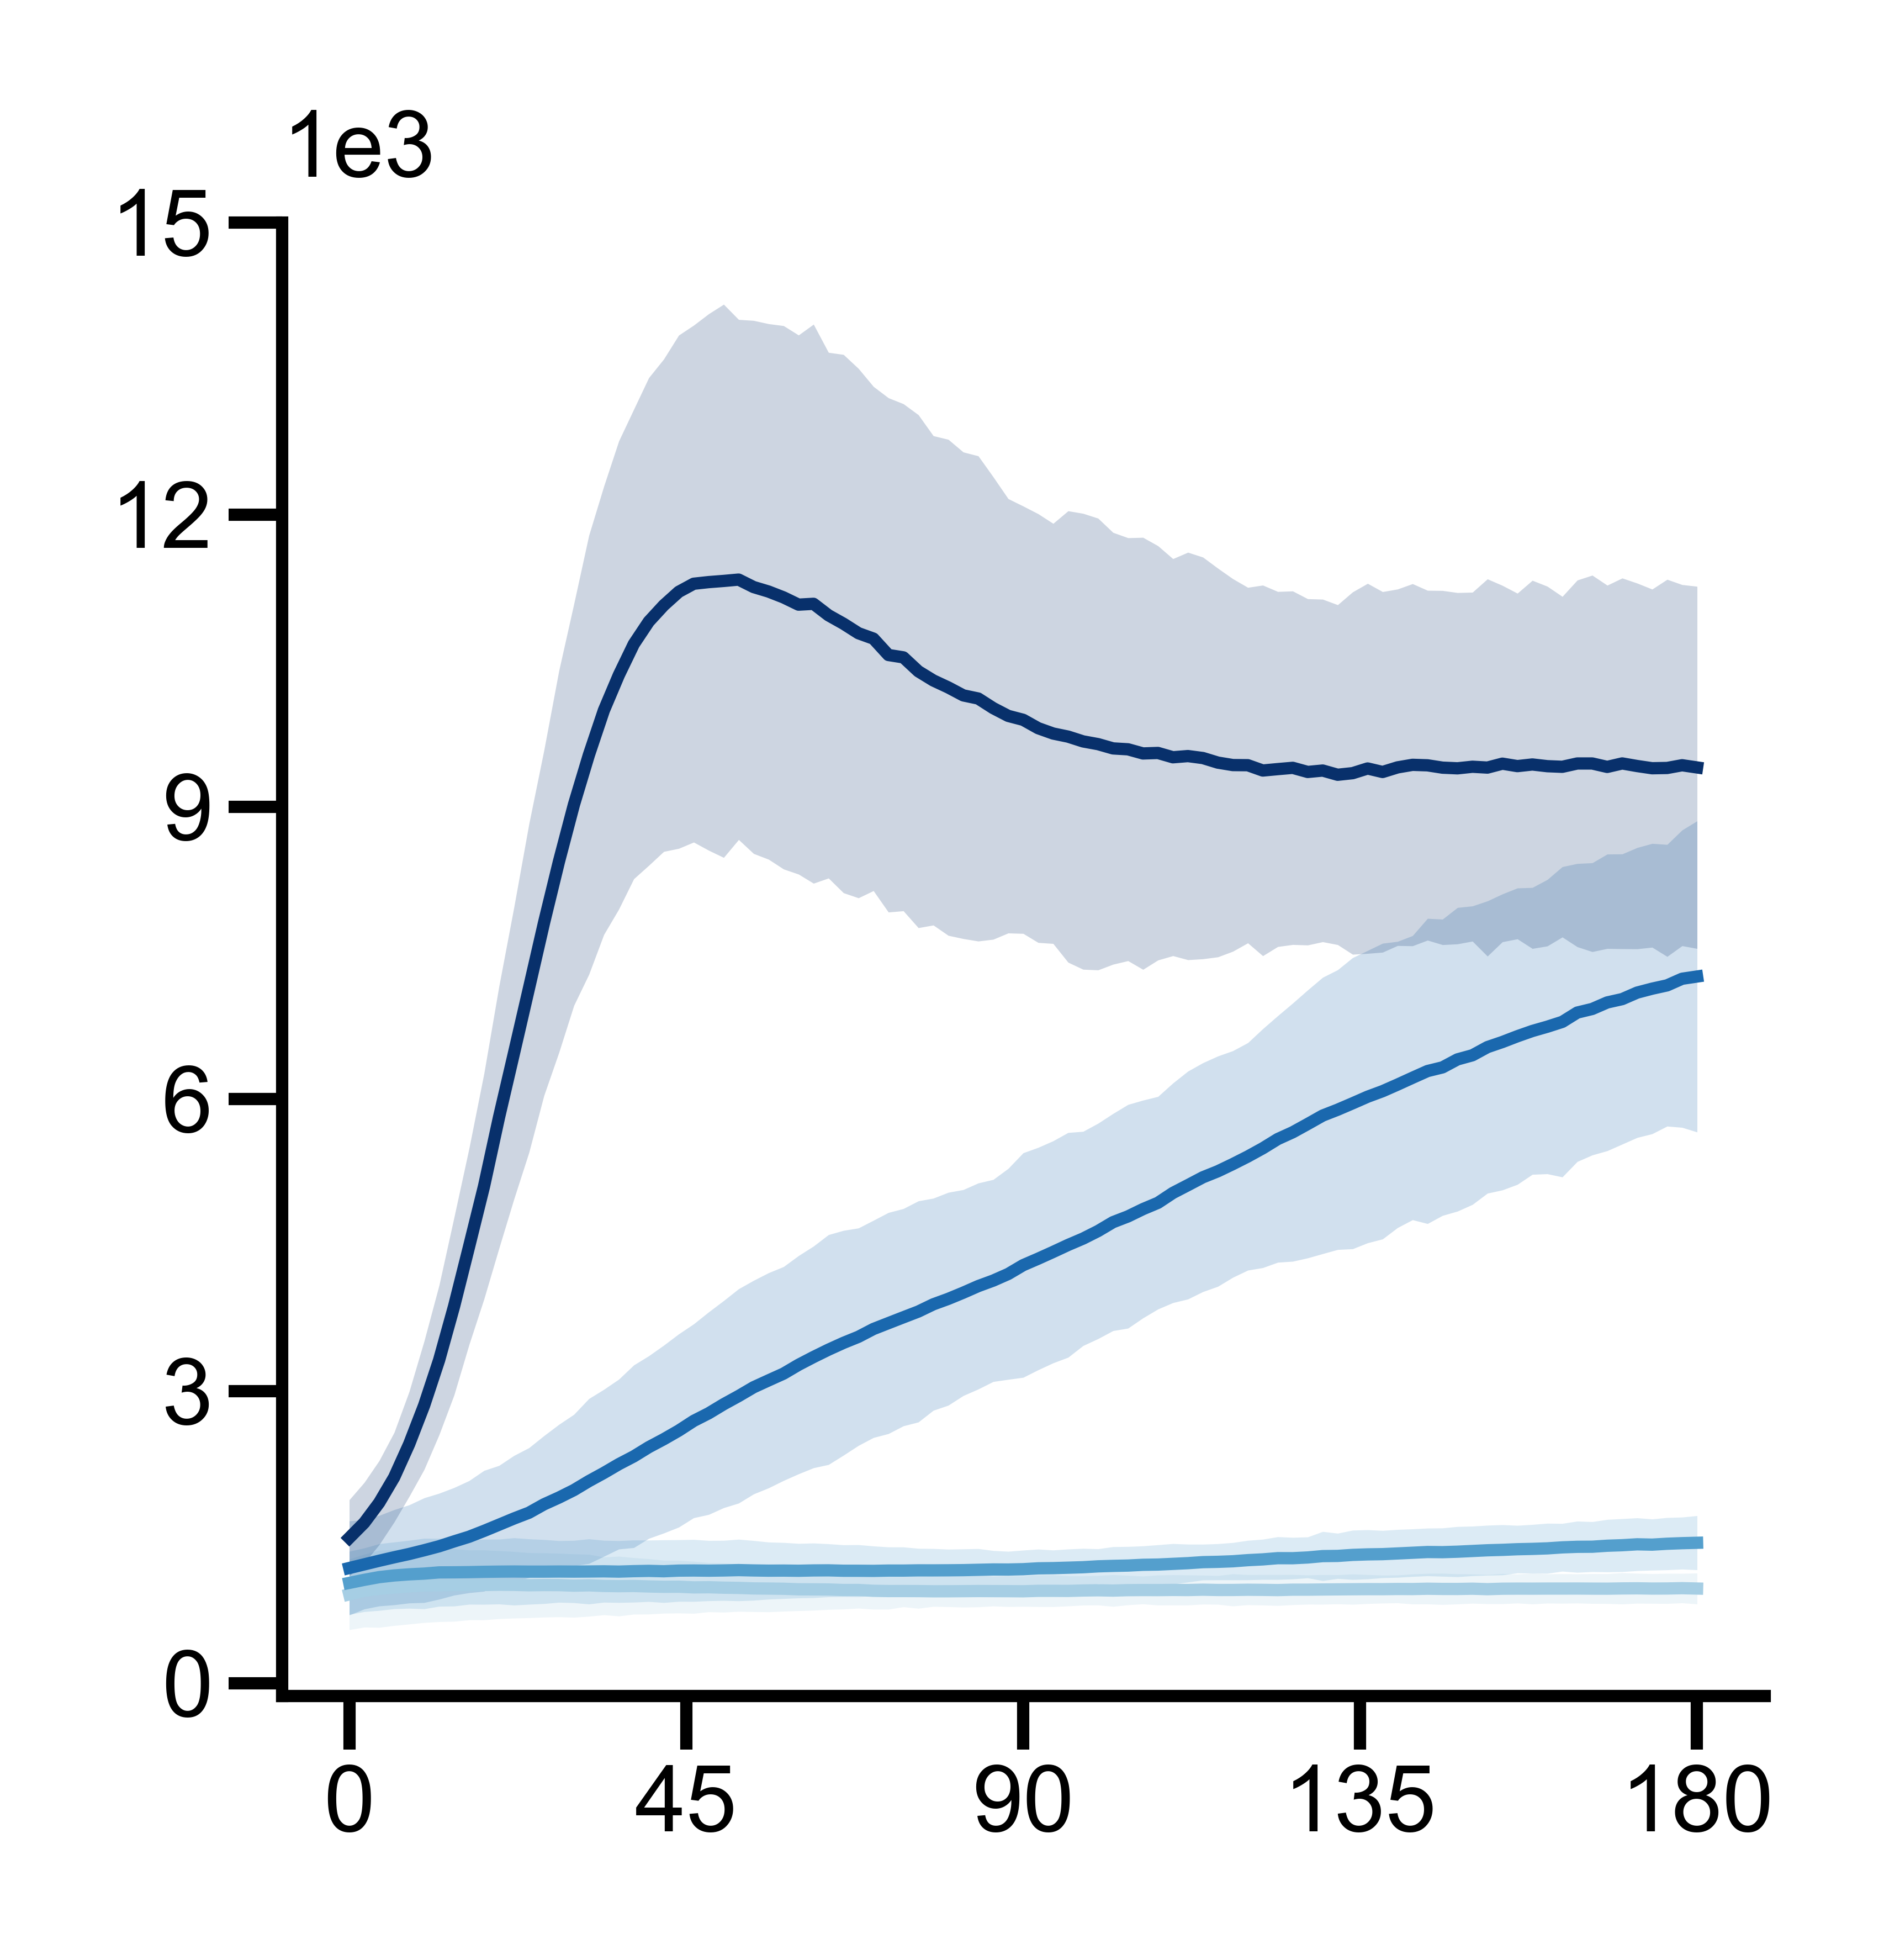

In [3]:

xfam = nk.tc(grna1_n20_FAM_high.index)
lns1 = [[xfam, grna1_n20_FAM_high.mean(axis=1)], [xfam, grna1_n20_FAM_med.mean(axis=1)], [xfam, grna1_n20_FAM_low.mean(axis=1)], [xfam, grna1_n20_FAM_neg.mean(axis=1)]][::-1]
errs1 = [grna1_n20_FAM_high.std(axis=1), grna1_n20_FAM_med.std(axis=1), grna1_n20_FAM_low.std(axis=1), grna1_n20_FAM_neg.std(axis=1)][::-1]
labels1 = ['High', 'Medium', 'Low', 'Negative'][::-1]



ax_fam = nkp.AxisPackage(lns1, labels1, errs1, ['Time (s)', 'FAM Fluorescence'])

apa = [[ax_fam]]
fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(4.4*cm, 4.4*cm), publish_ready=True, dpi=2000, color_output=True)
#fig.suptitle('gRNA1 FAM vs Quotient Comparison', fontsize=12)

a = ax[0][0]
a.set_xticks([0,45,90,135,180])
a.set_yticks([0,2500, 5000, 7500, 10000, 12500, 15000])
a.set_yticks([0,3000, 6000, 9000, 12000, 15000])
a.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
#a.set_xlim()
#a.grid(True)

plt.savefig('./charts/fig3A_n20_FAM_channel.svg', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig3A_n20_FAM_channel.png', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig3A_n20_FAM_channel.eps', dpi=2000, bbox_inches='tight')

# SubFg B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


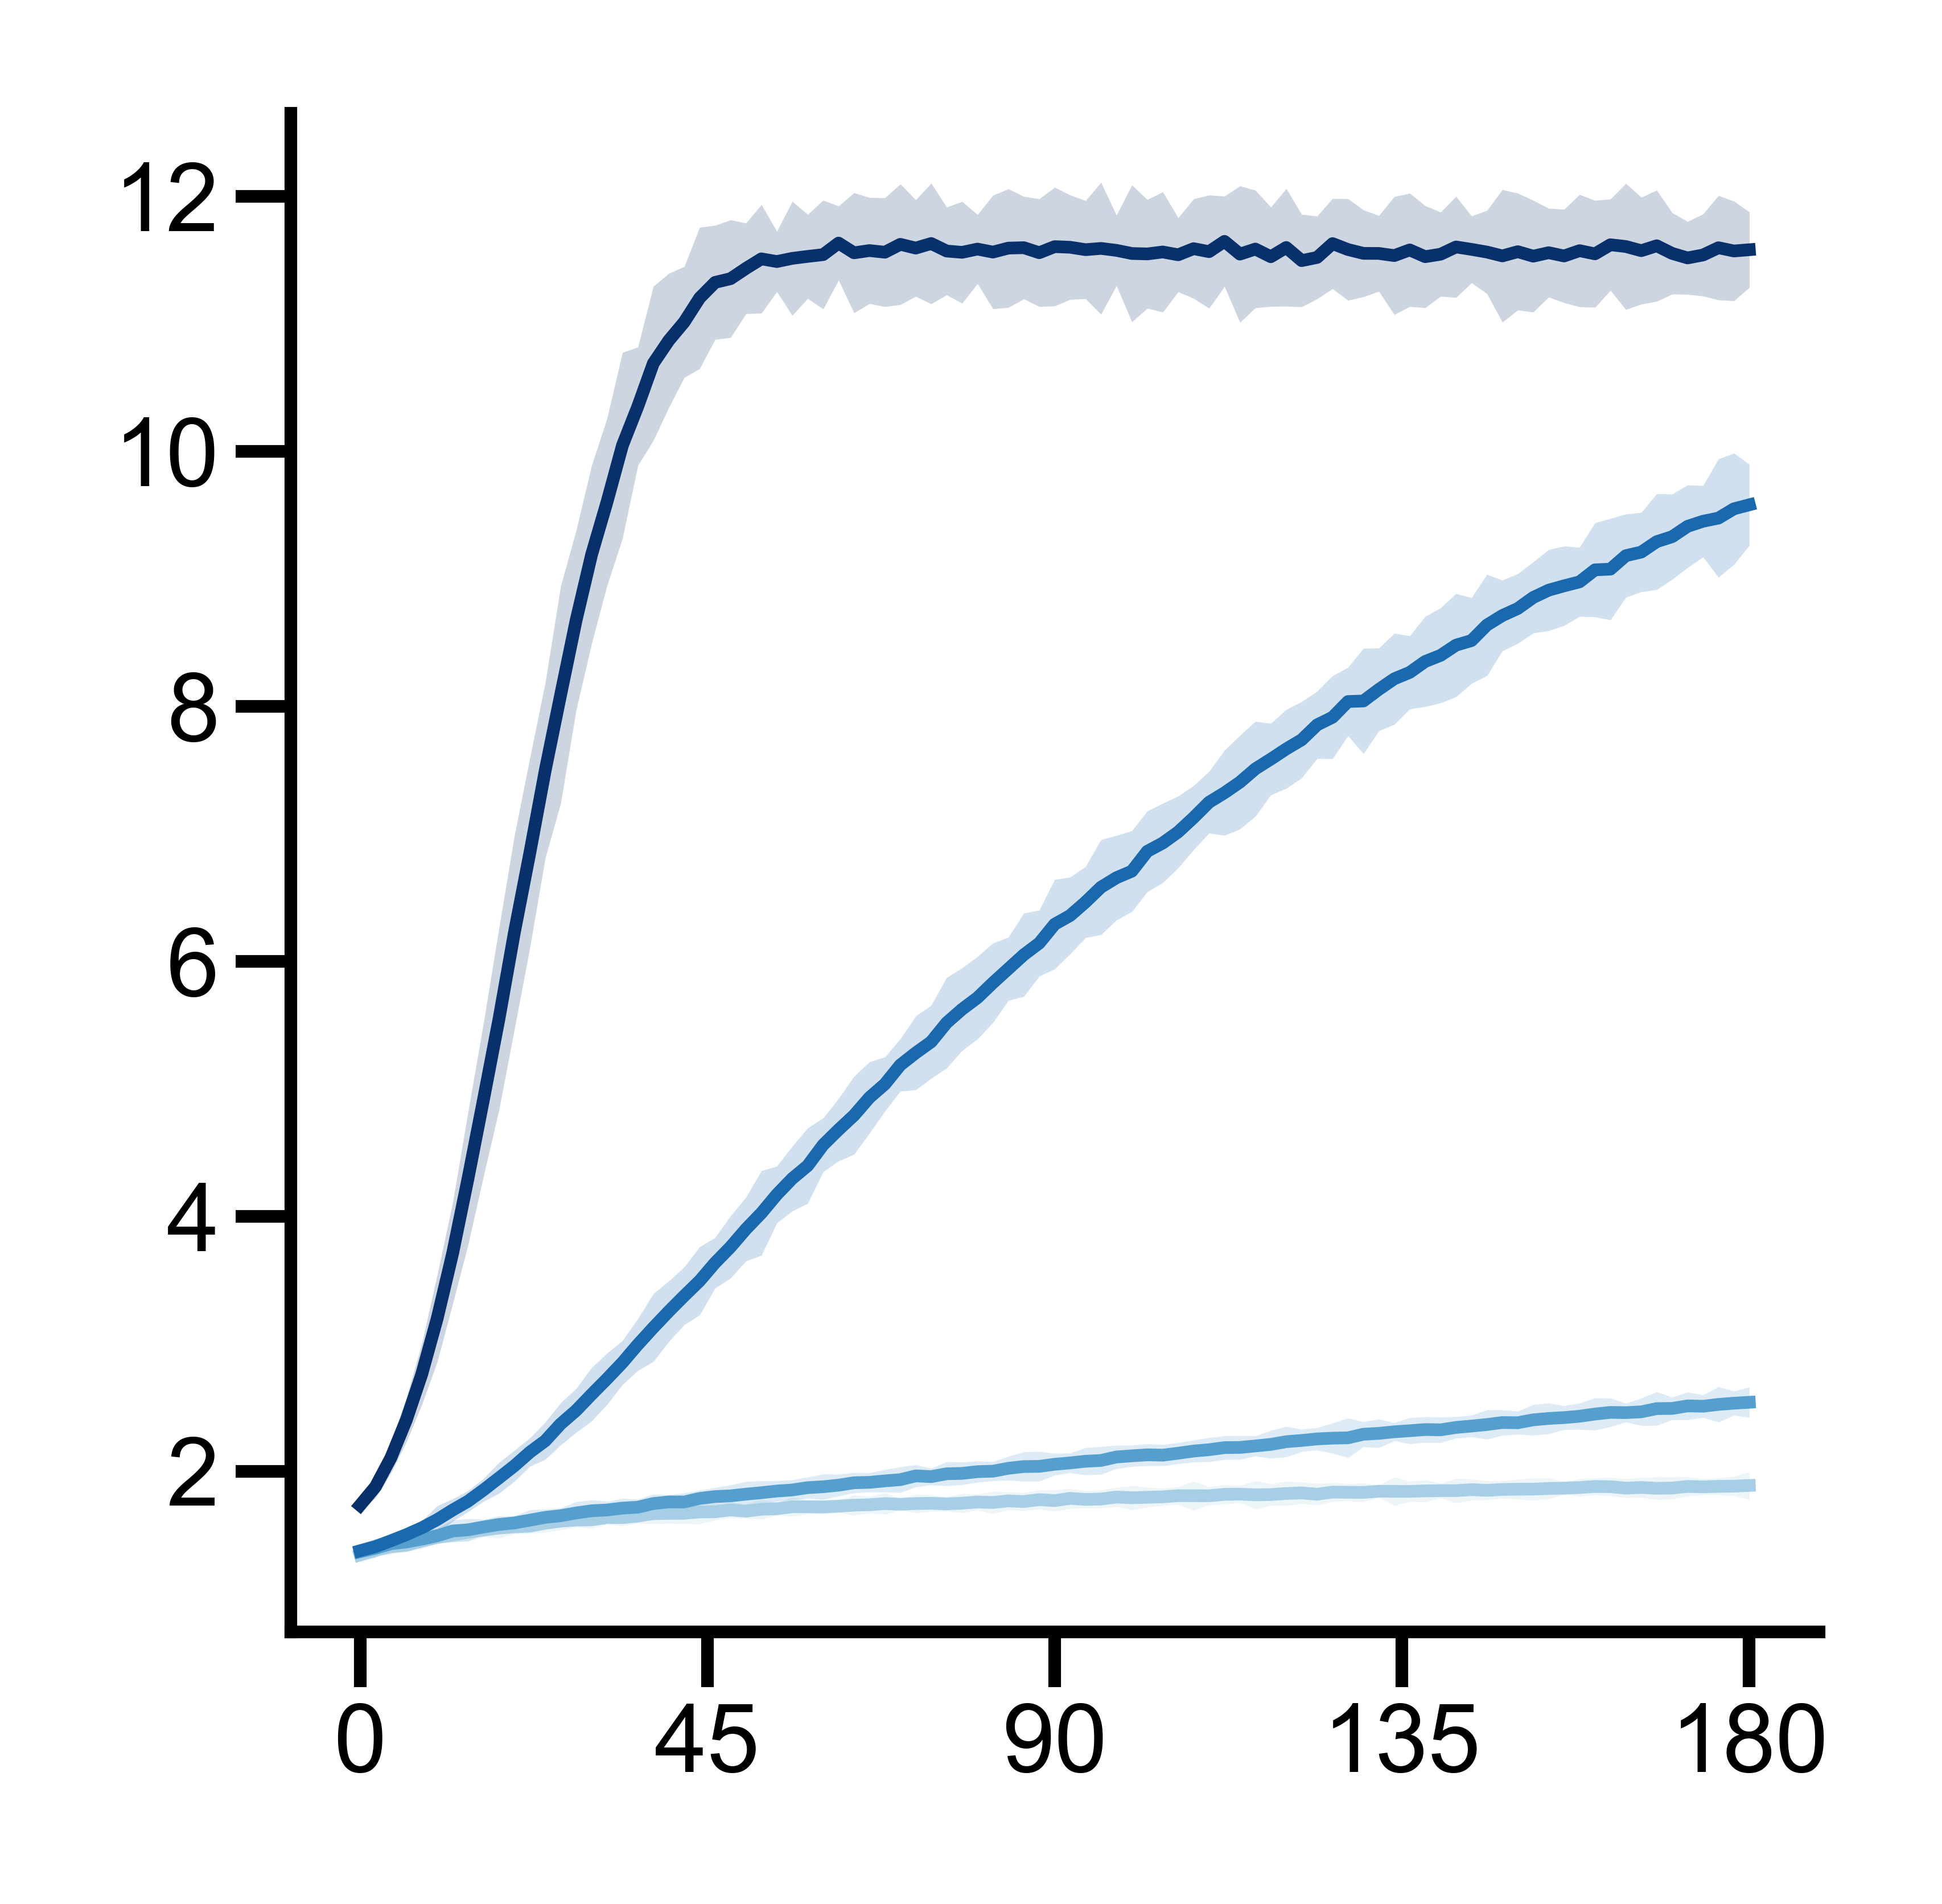

In [4]:
xq = nk.tc(grna1_n20_TAMRA_high.index)
lns2 = [[xq, grna1_n20_high_quotient_stats['mean']], [xq, grna1_n20_med_quotient_stats['mean']], [xq, grna1_n20_low_quotient_stats['mean']], [xq, grna1_n20_neg_quotient_stats['mean']]][::-1]
errs2 = [grna1_n20_high_quotient_stats['stdev'], grna1_n20_med_quotient_stats['stdev'], grna1_n20_low_quotient_stats['stdev'], grna1_n20_neg_quotient_stats['stdev']][::-1]
labels2 = ['_High', '_Medium', '_Low', '_Negative'][::-1]

axq = nkp.AxisPackage(lns2, labels2, errs2, ['Time (s)', 'FAM/TAMRA Quotient'])

apa = [[axq]]
fig, ax = nkp.general_lineplot_errorfill(apa, stdmult=std_mult, neg_std_mult=std_mult, figsize=(4.4*cm, 4.4*cm), publish_ready=True, dpi=2000)
#fig.suptitle('gRNA1 FAM vs Quotient Comparison', fontsize=12)

a = ax[0][0]
a.set_xticks([0,45,90,135,180])
#a.grid(True)

plt.savefig('./charts/fig3B_n20_QUOT_channel.eps', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig3B_n20_QUOT_channel.eps', dpi=2000, bbox_inches='tight')
plt.savefig('./charts/fig3B_n20_QUOT_channel.png', dpi=2000, bbox_inches='tight')

# SubFig C

quotmed: 16.9        singchan med: 41.5
quotlow: 69.3        singchan low: 139.0


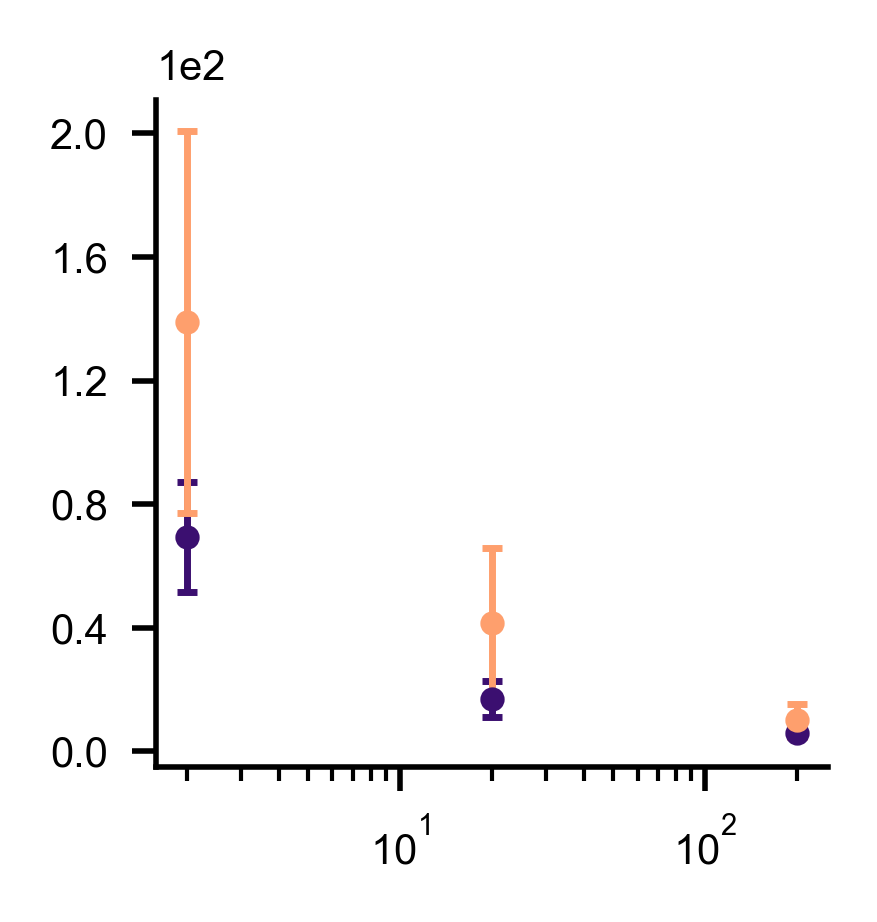

In [15]:
    """
    The dict in should be of the format {label: [[x_arr], [y_arr], [err_arr]], label2:....}
    """

nstdev=3
req_len_sep=4

ocolormap = mpl.colormaps['magma']
colors = ocolormap(np.linspace(0.2,.8, 1024))
colormap = mpl.colors.ListedColormap(colors)
colors = colormap(np.linspace(0, 1, 4))



htts, htts_stats = nk.time_to_significance(grna1_n20_FAM_high, grna1_n20_FAM_neg, nstdev=nstdev, req_len_sep=req_len_sep)
mtts, mtts_stats = nk.time_to_significance(grna1_n20_FAM_med, grna1_n20_FAM_neg, nstdev=nstdev, req_len_sep=req_len_sep)
ltts, ltts_stats = nk.time_to_significance(grna1_n20_FAM_low, grna1_n20_FAM_neg, nstdev=nstdev, req_len_sep=req_len_sep)

hqtts, hqtts_stats = nk.time_to_significance(grna1_n20_high_quotient, grna1_n20_neg_quotient, nstdev=nstdev, req_len_sep=req_len_sep)
mqtts, mqtts_stats = nk.time_to_significance(grna1_n20_med_quotient, grna1_n20_neg_quotient, nstdev=nstdev, req_len_sep=req_len_sep)
lqtts, lqtts_stats = nk.time_to_significance(grna1_n20_low_quotient, grna1_n20_neg_quotient, nstdev=nstdev, req_len_sep=req_len_sep)

print(f"quotmed: {mqtts_stats['mean']/60}        singchan med: {mtts_stats['mean']/60}")
print(f"quotlow: {lqtts_stats['mean']/60}        singchan low: {ltts_stats['mean']/60}")

d = {
    'Quotient': [[200, 20, 2], nk.tc([hqtts_stats['mean'], mqtts_stats['mean'], lqtts_stats['mean']]), nk.tc([hqtts_stats['std'], mqtts_stats['std'], lqtts_stats['std']]) ] ,
    'FAM Channel Only': [[200, 20, 2], nk.tc([htts_stats['mean'], mtts_stats['mean'], ltts_stats['mean']]), nk.tc([htts_stats['std'], mtts_stats['std'], ltts_stats['std']]) ]
}
    
f, a = nkp.tts_plot(d, colormap=colormap, include_fit=False, figsize=(4.4*cm, 4.4*cm), publish_ready=True)
a.set_xscale('log')


plt.savefig('./charts/fig3C_n20_tts.eps', dpi=1000, bbox_inches='tight')
plt.savefig('./charts/fig3C_n20_tts.svg', dpi=1000, bbox_inches='tight')
plt.savefig('./charts/fig3C_n20_tts.png', dpi=1000, bbox_inches='tight')